# Analisis exploratorio
## Carga de modulos y csv

In [1]:
import os
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Parámetros
CSV_PATH = "emotion_features.csv"  

# Columnas esperadas
EMOTION_COL = "emotion"
KEY_COL = "key"       # 0..11
MODE_COL = "mode"     # 0=min, 1=maj
NUM_COLS = ["tempo", "loudness", "energy", "acousticness"]
TOP_K_EMOTIONS = 10

sns.set_theme(style="whitegrid")



## Limpieza basica

In [2]:
usecols = [EMOTION_COL, KEY_COL, MODE_COL] + NUM_COLS
df = pd.read_csv(CSV_PATH)

df[EMOTION_COL] = df[EMOTION_COL].astype(str).str.lower()

# Eliminar clases con menos de 10 muestras 
counts = df[EMOTION_COL].value_counts()
valid_emotions = counts[counts >= 10].index
df = df[df[EMOTION_COL].isin(valid_emotions)].copy()

df

,emotion,key,mode,tempo,loudness,energy,acousticness
0,sadness,2,0,105,-6.85,83,11
1,sadness,10,0,117,-5.75,85,0
2,joy,9,1,121,-6.06,89,0
3,joy,9,0,122,-5.42,84,12
4,joy,5,0,123,-5.57,71,4
...,...,...,...,...,...,...,...
551438,joy,11,0,140,-10.00,82,39
551439,joy,8,1,128,-9.68,43,54
551440,sadness,8,0,75,-4.67,79,0
551441,sadness,4,1,126,-3.93,90,27


## Distribucion de clases

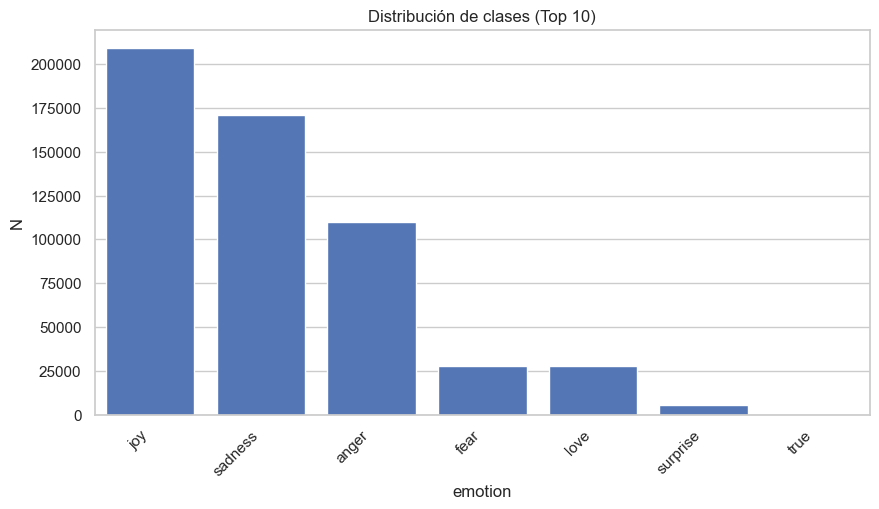

emotion
joy         209009
sadness     171078
anger       109678
fear         28097
love         27966
surprise      5592
true            17
Name: count, dtype: int64

In [3]:
vc = df[EMOTION_COL].value_counts().sort_values(ascending=False)
plt.figure(figsize=(10,5))
sns.barplot(x=vc.index[:TOP_K_EMOTIONS], y=vc.values[:TOP_K_EMOTIONS], color="#4472C4")
plt.title(f"Distribución de clases (Top {TOP_K_EMOTIONS})")
plt.ylabel("N")
plt.xticks(rotation=45, ha="right")
plt.show()

vc.head(20)

## Histograma de cantidad para columnas

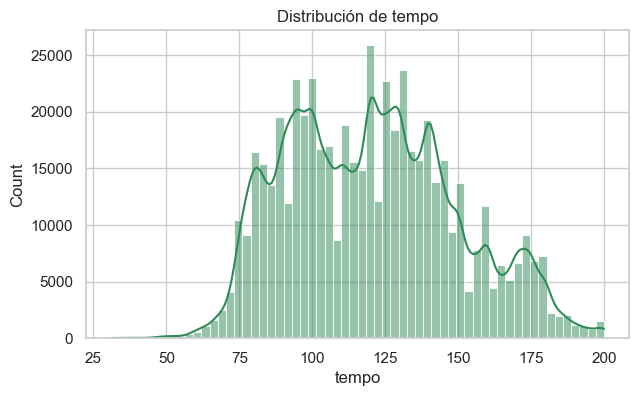

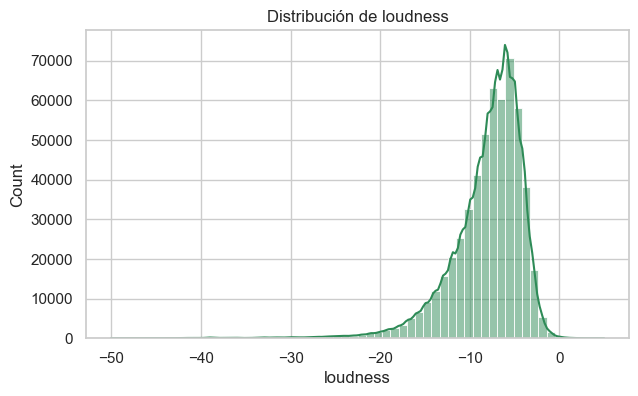

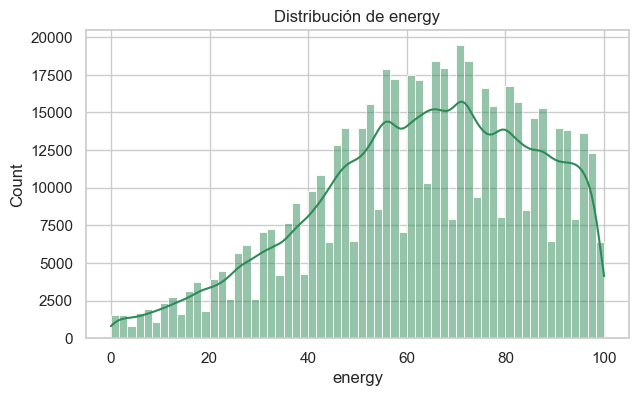

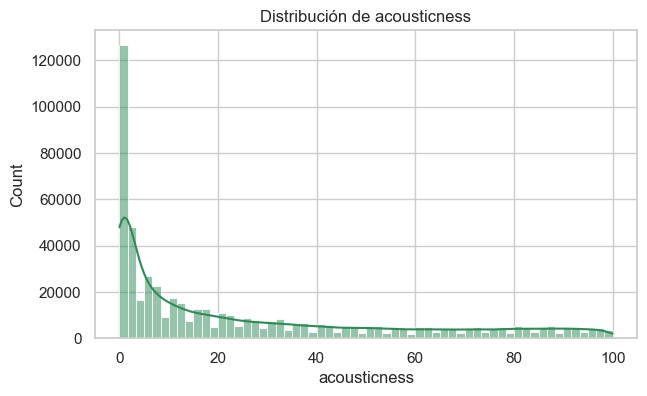

In [4]:
dplot = df.sample(len(df), random_state=42)

for col in ["tempo", "loudness", "energy", "acousticness"]:
    plt.figure(figsize=(7,4))
    sns.histplot(dplot[col], bins=60, kde=True, color="#2E8B57")
    plt.title(f"Distribución de {col}")
    plt.show()

## Distribucion de key minor y major

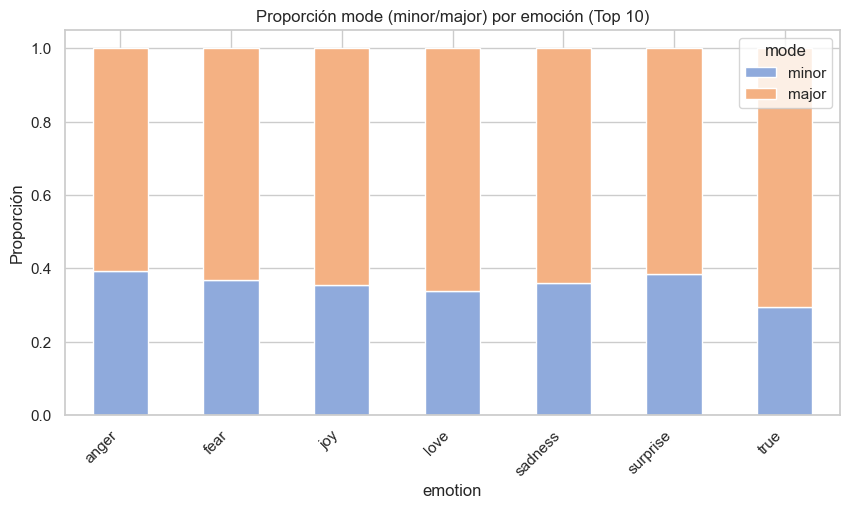

mode,minor,major
emotion,,
anger,0.391701,0.608299
fear,0.368153,0.631847
joy,0.354860,0.645140
love,0.337589,0.662411
sadness,0.360344,0.639656


In [5]:
TOP_K_EMOTIONS = 10  
top_emotions = df[EMOTION_COL].value_counts().nlargest(TOP_K_EMOTIONS).index
d_top = df[df[EMOTION_COL].isin(top_emotions)].copy()

# Tabla de proporciones de mode (minor/major) por emoción
ct = pd.crosstab(
    d_top[EMOTION_COL],
    d_top[MODE_COL],
    normalize="index"
).rename(columns={0: "minor", 1: "major"})

# Visualización
ct.plot(kind="bar", stacked=True, figsize=(10, 5), color=["#8FAADC", "#F4B183"])
plt.title(f"Proporción mode (minor/major) por emoción (Top {TOP_K_EMOTIONS})")
plt.ylabel("Proporción")
plt.xticks(rotation=45, ha="right")
plt.legend(title="mode")
plt.show()

ct.head()


## Distribucion de key por emocion

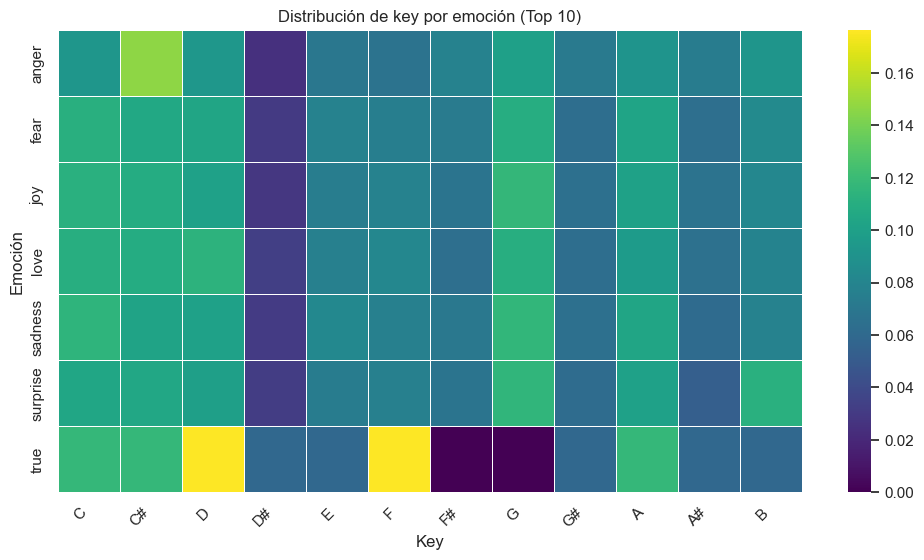

key_name,C,C#,D,D#,E,F,F#,G,G#,A,A#,B
emotion,,,,,,,,,,,,
anger,0.092462,0.146657,0.093483,0.024344,0.069668,0.067106,0.077618,0.099801,0.072239,0.091413,0.073296,0.091915
fear,0.111257,0.106132,0.103997,0.029861,0.077588,0.074705,0.072819,0.109691,0.063388,0.103143,0.063993,0.083425
joy,0.112024,0.108794,0.100560,0.028094,0.074203,0.077379,0.068088,0.116502,0.064686,0.100718,0.067533,0.081418
love,0.110849,0.108775,0.113137,0.032575,0.075914,0.081563,0.063613,0.110348,0.063255,0.095938,0.065186,0.078846
sadness,0.114579,0.102608,0.100013,0.030916,0.082512,0.076158,0.070430,0.116391,0.064269,0.103584,0.061031,0.077509


In [6]:
# Nombres de notas musicales (0..11)
KEY_NAMES = ['C','C#','D','D#','E','F','F#','G','G#','A','A#','B']

d_top["key_name"] = d_top[KEY_COL].astype(int).map(lambda k: KEY_NAMES[k] if 0 <= k < 12 else np.nan)

# Crosstab normalizado por emoción
ct_key = (
    pd.crosstab(
        d_top[EMOTION_COL],
        d_top["key_name"],
        normalize="index"
    )
    .reindex(columns=KEY_NAMES, fill_value=0.0)  
)

# Visualización tipo heatmap
plt.figure(figsize=(12, 6))
sns.heatmap(ct_key, cmap="viridis", linewidths=0.5, annot=False)
plt.title(f"Distribución de key por emoción (Top {TOP_K_EMOTIONS})")
plt.xlabel("Key")
plt.ylabel("Emoción")
plt.xticks(rotation=45, ha="right")
plt.show()

ct_key.head()


## Correlacion entre features

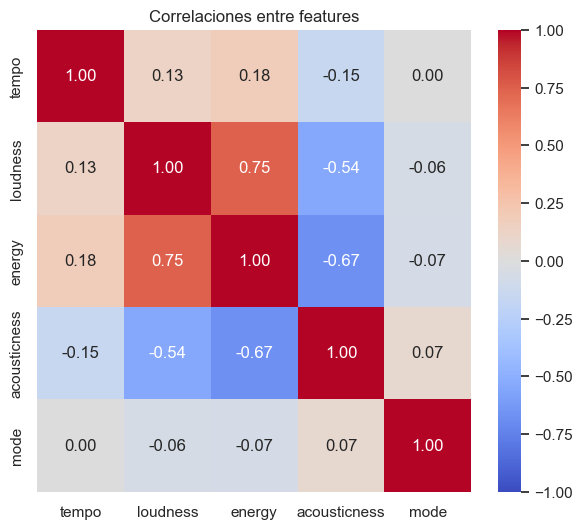

,tempo,loudness,energy,acousticness,mode
tempo,1.000000,0.127045,0.178314,-0.150244,0.004190
loudness,0.127045,1.000000,0.746677,-0.543737,-0.056566
energy,0.178314,0.746677,1.000000,-0.672733,-0.066849
acousticness,-0.150244,-0.543737,-0.672733,1.000000,0.072967
mode,0.004190,-0.056566,-0.066849,0.072967,1.000000


In [7]:
use_cols = ["tempo","loudness","energy","acousticness", MODE_COL]
corr = df[use_cols].corr(numeric_only=True)
plt.figure(figsize=(7,6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", vmin=-1, vmax=1)
plt.title("Correlaciones entre features")
plt.show()

corr

## Resumen analisis exploratorio inicial
* Existe un fuerte desbalance de clases, se requiere usar class weight
* Hay una fuerte correlacion entre loudness y energy
* Acousticness esta muy sesgada a 0
* El dataset comete errores de etiquetado, usando love en vez de Love, angry en vez de anger, pink, refiriendose a un artista en vez de emocion, todos estos casos tenian 2 o menos valores, por lo que se considero lo mas prudente eliminar todas las columnas con menos de 10 filas
* En la proporcion de mode minor/major major es ligeramente dominante
* En la distribucion de key por emocion todo esta equilibrado a excepcion de D#, pero este es constante en todas las emociones, no deberia requerir cambios

# Modelo
Para el modelo se usara lightGBM debido a que es util cuando se tienen pocas columnas pero muchas filas

Se usara un class weight inverso a la frecuencia para lidear con el desbalance de clases y conservarlas todas w_c = N_total / (K · N_c)

Para acousticness se utilizara Sqrt sobre un 0-1, esto abre el rango para dar mas resolucion sobre donde se tienen la mayoria de puntos

## Preparación del dataset

En el siguiente bloque se realiza la preparación del dataset. Esto incluye:

* Paso a tensores de PyTorch
* División del dataset en train y test
* Carga de los datos en DataLoader

In [8]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
import torch
from torch.utils.data import TensorDataset, DataLoader

# Cargar dataset
CSV_PATH = "emotion_features.csv"
df = pd.read_csv(CSV_PATH)

EMOTION_COL = "emotion"

counts = df[EMOTION_COL].value_counts()
valid_emotions = counts[counts >= 10].index
df = df[df[EMOTION_COL].isin(valid_emotions)].copy()

df

# Seleccionar features y etiqueta
X = df[['tempo', 'loudness', 'energy', 'acousticness', 'key', 'mode']].values
y = df['emotion'].values

# Codificar etiquetas 
encoder = LabelEncoder()
y_encoded = encoder.fit_transform(y)

# Escalar caracteristicas numericas
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Convertir a tensores de PyTorch
X_tensor = torch.tensor(X_scaled, dtype=torch.float32)
y_tensor = torch.tensor(y_encoded, dtype=torch.long)

# Division en entrenamiento y test (estratificada)
X_train, X_test, y_train, y_test = train_test_split(
    X_tensor, y_tensor, test_size=0.2, random_state=42, stratify=y_tensor)

# Crear DataLoaders
batch_size = 512
train_df = TensorDataset(X_train, y_train)
test_df = TensorDataset(X_test, y_test)

train_loader = DataLoader(train_df, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_df, batch_size=batch_size)


## Red neuronal

In [9]:
import torch.nn as nn

input_dim = X_tensor.shape[1]  # 6
num_classes = len(np.unique(y_encoded))  # 6

print("input_dim:", input_dim)
print("num_classes:", num_classes)

class EmotionNet(nn.Module):
    def __init__(self, input_dim, num_classes):
        super(EmotionNet, self).__init__()
        self.net = nn.Sequential(
            nn.Linear(input_dim, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 32),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(32, num_classes)
        )

    def forward(self, x):
        return self.net(x)

model = EmotionNet(input_dim, num_classes)

input_dim: 6
num_classes: 7


## Funcion de perdida y optimizador


In [13]:
import torch.optim as optim

# Funcion de perdida
criterion = nn.CrossEntropyLoss()

# Optimizador 
optimizer = optim.Adam(model.parameters(), lr=0.001)


## Entrenamiento

In [12]:
num_epochs = 30  
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model = model.to(device)

for epoch in range(num_epochs):
    model.train()
    total_loss = 0.0
    correct = 0
    total = 0

    for batch_X, batch_y in train_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)

        optimizer.zero_grad()
        outputs = model(batch_X)
        loss = criterion(outputs, batch_y)
        loss.backward()
        optimizer.step()

        total_loss += loss.item() * batch_X.size(0)
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == batch_y).sum().item()
        total += batch_y.size(0)

    avg_loss = total_loss / total
    accuracy = correct / total * 100

    print(f"Epoca {epoch+1}/{num_epochs} - Perdida: {avg_loss:.4f} - Exactitud: {accuracy:.2f}%")


Época 1/30 - Pérdida: 1.8710 - Exactitud: 15.92%
Época 2/30 - Pérdida: 1.8794 - Exactitud: 14.44%
Época 3/30 - Pérdida: 1.8787 - Exactitud: 16.02%
Época 4/30 - Pérdida: 1.8684 - Exactitud: 15.59%
Época 5/30 - Pérdida: 1.8535 - Exactitud: 16.43%
Época 6/30 - Pérdida: 1.8396 - Exactitud: 16.32%
Época 7/30 - Pérdida: 1.8400 - Exactitud: 16.08%
Época 8/30 - Pérdida: 1.8406 - Exactitud: 15.16%
Época 9/30 - Pérdida: 1.8403 - Exactitud: 16.17%
Época 10/30 - Pérdida: 1.8282 - Exactitud: 16.75%
Época 11/30 - Pérdida: 1.8386 - Exactitud: 16.04%
Época 12/30 - Pérdida: 1.8279 - Exactitud: 16.84%
Época 13/30 - Pérdida: 1.8328 - Exactitud: 15.40%
Época 14/30 - Pérdida: 1.8359 - Exactitud: 16.10%
Época 15/30 - Pérdida: 1.8315 - Exactitud: 15.47%
Época 16/30 - Pérdida: 1.8323 - Exactitud: 15.95%
Época 17/30 - Pérdida: 1.8348 - Exactitud: 17.14%
Época 18/30 - Pérdida: 1.8308 - Exactitud: 16.51%
Época 19/30 - Pérdida: 1.8450 - Exactitud: 16.74%
Época 20/30 - Pérdida: 1.8518 - Exactitud: 16.82%
Época 21/

## Evaluacion

In [ ]:
model.eval()
correct = 0
total = 0

with torch.no_grad():
    for batch_X, batch_y in test_loader:
        batch_X, batch_y = batch_X.to(device), batch_y.to(device)
        outputs = model(batch_X)
        _, predicted = torch.max(outputs, 1)
        correct += (predicted == batch_y).sum().item()
        total += batch_y.size(0)

test_acc = correct / total * 100
print(f"\nExactitud en test: {test_acc:.2f}%")
